In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import segmentation_functions as sf
def load_nifti_image(file_path):
    """
    Carica un'immagine NIfTI (.nii.gz) e restituisce i dati dell'immagine come array numpy.
    """
    img = nib.load(file_path)
    img_data = img.get_fdata()
    return img_data

def get_slice_with_largest_label(mri_path, label_path):
    """
    Carica l'immagine MRI e le label, e restituisce lo slice con la label più grande.
    """
    mri_data = load_nifti_image(mri_path)
    label_data = load_nifti_image(label_path)
    # Rendi tutti i valori != 0 uguali a 1
    label_data[label_data != 0] = 1
    # Trova lo slice con la label più grande
    slice_index = np.argmax(np.sum(label_data, axis=(0, 1)))
    
    # Restituisce lo slice dell'immagine MRI corrispondente
    mri_slice = mri_data[:, :, slice_index]
    label_slice = label_data[:, :, slice_index]
    
    return mri_slice, label_slice
def visualize_slice(mri_slice, label_slice, mri_title='MRI', label_title='Label'):
    """
    Visualizza lo slice dell'immagine MRI e delle label.
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(mri_slice, cmap='gray')
    ax[0].set_title(mri_title)
    ax[1].imshow(label_slice, cmap='Reds', vmin=0, vmax=1)
    ax[1].set_title(label_title)
    plt.show()
def dice_score(mask1, mask2):
    """
    Calcola il coefficiente di Dice tra due maschere binarie.
    """
    intersection = np.sum(mask1 * mask2)
    return 2. * intersection / (np.sum(mask1) + np.sum(mask2))


In [2]:
mri_folder_path = '.\\Liver_CT\\imagesTr\\'
label_folder_path = '.\\Liver_CT\\labelsTr\\'

Iteration: 101
Dice score (Watershed): 0.9835933666961044
Dice score (Exploration): 0.8825319964560471
Dice score (Flood): 0.9849338977270448
Iteration: 102
Dice score (Watershed): 0.9557117100457676
Dice score (Exploration): 0.968070287049326
Dice score (Flood): 0.9590572254270261
Iteration: 103
Dice score (Watershed): 0.9725178835126479
Dice score (Exploration): 0.9674649365518557
Dice score (Flood): 0.9651151181133809
Iteration: 104
Dice score (Watershed): 0.936789682032946
Dice score (Exploration): 0.7575494948947811
Dice score (Flood): 0.9551919092601047
Iteration: 105
Dice score (Watershed): 0.9136497107590597
Dice score (Exploration): 0.8794602966581283
Dice score (Flood): 0.9121520835316893
Iteration: 106
Dice score (Watershed): 0.9122883274472516
Dice score (Exploration): 0.9389789906445243
Dice score (Flood): 0.9614025596375255
Iteration: 107
Dice score (Watershed): 0.8779708218614514
Dice score (Exploration): 0.8593909099324262
Dice score (Flood): 0.9354403616214639
Iteratio

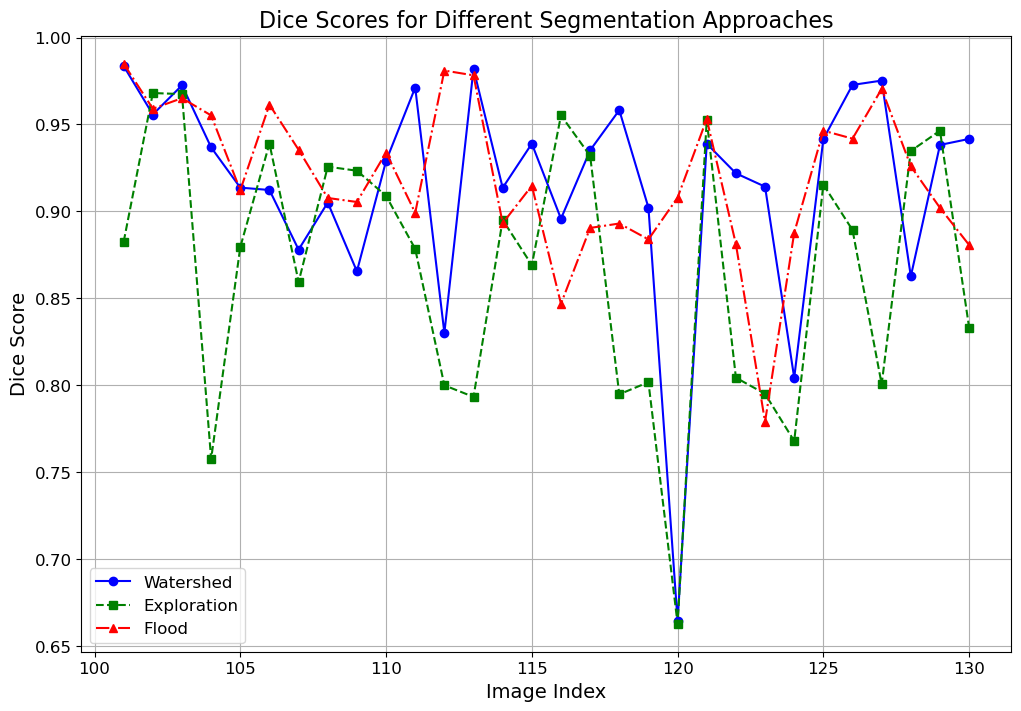

In [3]:
dice_scores = {
    'watershed': [],
    'exploration': [],
    'flood': []
}

StartTesing=101
EndTesting=130
for i in range(StartTesing,EndTesting+1):

    mri_path = mri_folder_path+f'liver_{i}.nii.gz'
    label_path = label_folder_path + f'liver_{i}.nii.gz'
    mri_slice, label_slice = get_slice_with_largest_label(mri_path, label_path)
    # Estrai i valori di mri_slice dove label_slice è 1
    mri_values_in_label = mri_slice[label_slice == 1]

    wshedmask = sf.watershed_segmentation(mri_slice, tolerance=(50, 200))
    exploremask = sf.exploration_segmentation(mri_slice, label_slice, tolerance=(50, 200))
    floodmask = sf.flood_segmentation(mri_slice, label_slice, tolerance=(50, 200))

    dice_scores['watershed'].append(dice_score(wshedmask, label_slice))
    dice_scores['exploration'].append(dice_score(exploremask, label_slice))
    dice_scores['flood'].append(dice_score(floodmask, label_slice))
    print(f"Iteration: {i}")
    print(f"Dice score (Watershed): {dice_scores['watershed'][-1]}")
    print(f"Dice score (Exploration): {dice_scores['exploration'][-1]}")
    print(f"Dice score (Flood): {dice_scores['flood'][-1]}")

print(f"Average Dice score (Watershed): {np.mean(dice_scores['watershed'])}")
print(f"Average Dice score (Exploration): {np.mean(dice_scores['exploration'])}")
print(f"Average Dice score (Flood): {np.mean(dice_scores['flood'])}")
# Plot dei Dice score per i 3 approcci
plt.figure(figsize=(12, 8))
plt.plot(range(StartTesing, EndTesting + 1), dice_scores['watershed'], marker='o', linestyle='-', label='Watershed', color='b')
plt.plot(range(StartTesing, EndTesting + 1), dice_scores['exploration'], marker='s', linestyle='--', label='Exploration', color='g')
plt.plot(range(StartTesing, EndTesting + 1), dice_scores['flood'], marker='^', linestyle='-.', label='Flood', color='r')
plt.xlabel('Image Index', fontsize=14)
plt.ylabel('Dice Score', fontsize=14)
plt.title('Dice Scores for Different Segmentation Approaches', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

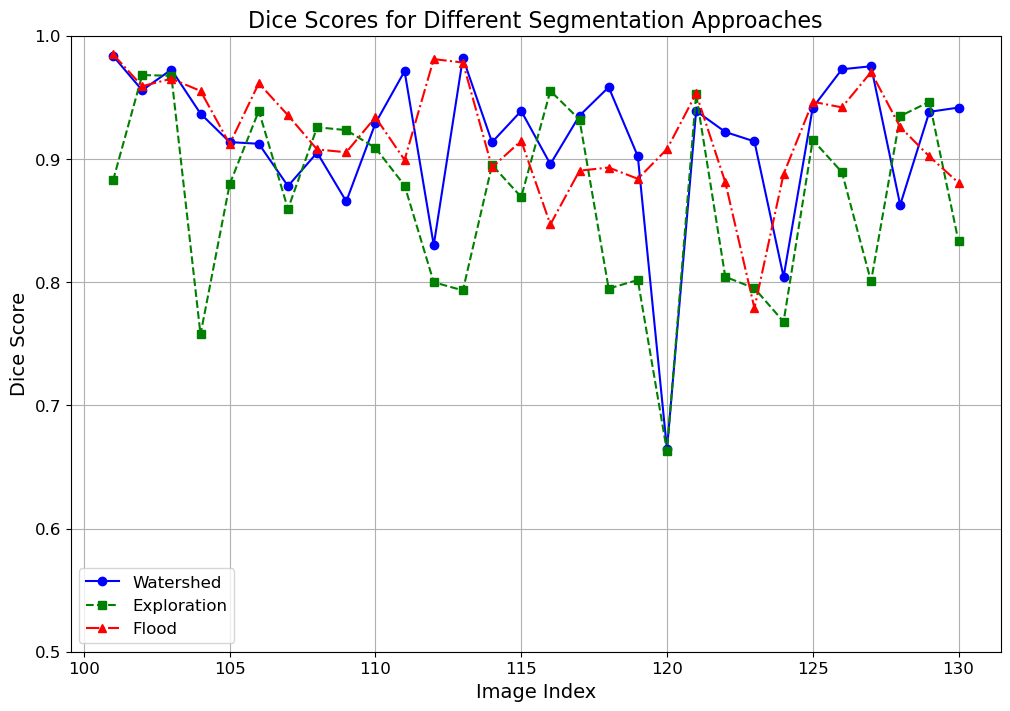

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(range(StartTesing, EndTesting + 1), dice_scores['watershed'], marker='o', linestyle='-', label='Watershed', color='b')
plt.plot(range(StartTesing, EndTesting + 1), dice_scores['exploration'], marker='s', linestyle='--', label='Exploration', color='g')
plt.plot(range(StartTesing, EndTesting + 1), dice_scores['flood'], marker='^', linestyle='-.', label='Flood', color='r')
plt.xlabel('Image Index', fontsize=14)
plt.ylabel('Dice Score', fontsize=14)
plt.title('Dice Scores for Different Segmentation Approaches', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.5, 1)
plt.show()